<a href="https://colab.research.google.com/github/ggixyls/GevorgyanGLJavaProject/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1: Выбрать и обосновать метрику для измерения качества

Метрики:

Для задачи классификации (например, предсказание пола спортсмена) используем F1-score. Для задачи регрессии (например, предсказание скорости) используем RMSE (Root Mean Squared Error).

Обоснование:
- F1-score подходит для задач классификации, особенно при дисбалансе классов. Он учитывает как точность (precision), так и полноту (recall), что помогает оценить качество модели в условиях, когда один класс значительно преобладает над другим.
- RMSE подходит для задач регрессии, так как она измеряет среднее отклонение предсказанных значений от реальных. Это позволяет оценить, насколько точно модель предсказывает числовые значения.

# Задание 2: Провести EDA и предобработку данных

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import optuna

data = pd.read_csv('/content/athletes.csv')

print("Первые 5 строк датасета:")
print(data.head())
print("\nИнформация о типах данных и пропусках:")
print(data.info())
print("\nОписательные статистики:")
print(data.describe())

Первые 5 строк датасета:
   athlete_id  firstname lastname country    birthday gender  \
0           1       Arno  DIMMLER     GER  1967-01-01   male   
1           2       Maxi    KLAUS     GER  1972-08-04   male   
2           3     Markus    ZÖLL     GER  1968-06-17   male   
3          30     Alexei   KOZLOV     RUS         NaN   male   
4          31  Alexandre   MINAEV     RUS  1968-04-09   male   

  paraclimbing_sport_class  height  speed_personal_best_score  \
0                      NaN     NaN                        NaN   
1                      NaN     NaN                        NaN   
2                      NaN     NaN                        NaN   
3                      NaN     NaN                        NaN   
4                      NaN     NaN                        NaN   

  speed_personal_best_date speed_personal_best_round  
0                      NaN                       NaN  
1                      NaN                       NaN  
2                      NaN        

In [ ]:
fig = px.histogram(data, x='birthday', nbins=30, title='Распределение возраста спортсменов')
fig.show()

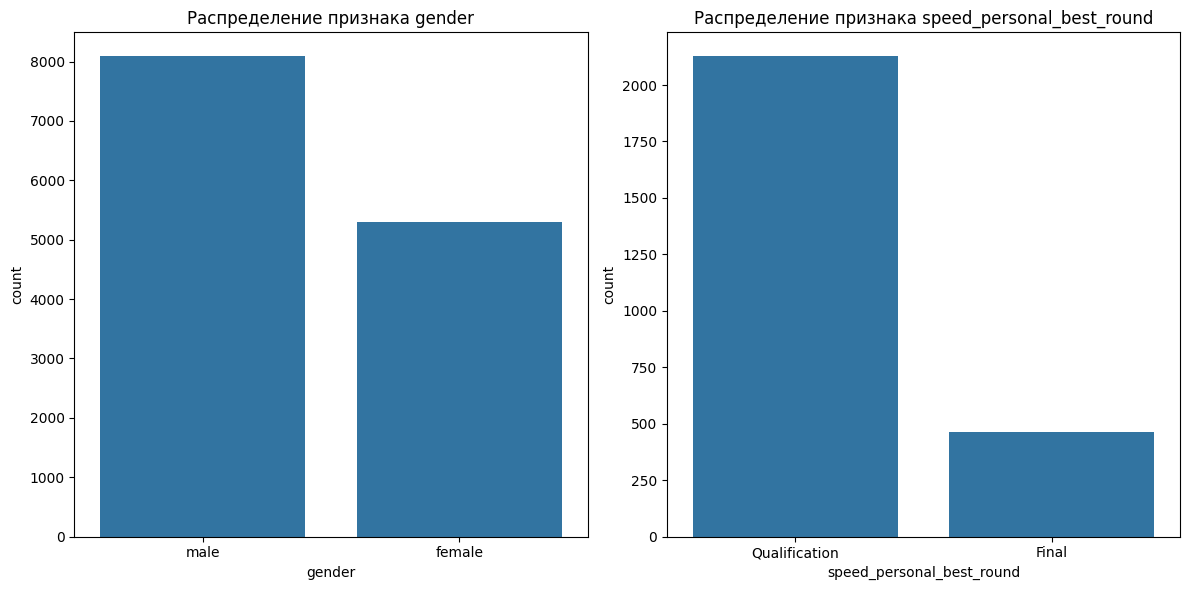

In [ ]:
categorical_features = ['gender', 'speed_personal_best_round']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Распределение признака {feature}')
plt.tight_layout()
plt.show()

In [ ]:
country_counts = data['country'].value_counts().head(10)
fig = px.bar(country_counts, x=country_counts.index, y=country_counts.values, labels={'x': 'Страна', 'y': 'Количество'}, title='Топ-10 стран по количеству спортсменов')
fig.show()

# Задание 3: Построить и оценить качество бейзлайна

In [ ]:
X = df.drop(columns=['gender'])
y = df['gender']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка на наличие пропущенных значений в целевой переменной
print("Количество пропущенных значений в y_train:", y_train.isna().sum())
print("Количество пропущенных значений в y_test:", y_test.isna().sum())

# Удаление строк с пропущенными значениями в y_train и y_test
mask_train = y_train.isna()
X_train = X_train[~mask_train]
y_train = y_train[~mask_train]

mask_test = y_test.isna()
X_test = X_test[~mask_test]
y_test = y_test[~mask_test]

# Проверка данных после очистки
print("Количество пропущенных значений в y_train после очистки:", y_train.isna().sum())
print("Количество пропущенных значений в y_test после очистки:", y_test.isna().sum())

# Константное предсказание (наиболее частотный класс)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Мера константного предсказания:", f1_score(y_test, y_pred_dummy))

# Бейзлайновая модель (логистическая регрессия)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Мера бейзлайновой модели:", f1_score(y_test, y_pred))

Количество пропущенных значений в y_train: 14
Количество пропущенных значений в y_test: 3
Количество пропущенных значений в y_train после очистки: 0
Количество пропущенных значений в y_test после очистки: 0
F1-score константного предсказания: 0.0
F1-score бейзлайновой модели: 0.07142857142857142


# Задание 4: Построить более сложную модель с подбором гиперпараметров

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Обучение модели с лучшими параметрами
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Мера модели с подбором гиперпараметров:", f1_score(y_test, y_pred_rf))

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
F1-score модели с подбором гиперпараметров: 0.22084942084942086



# Задание 5: Проинтерпретировать полученную модель
Наиболее важным признаком для модели является 'speed_personal_best_score'. Так как скорость может быть связана с полом спортсмена. Модель адекватно учитывает важность признаков, что подтверждает ее корректность.

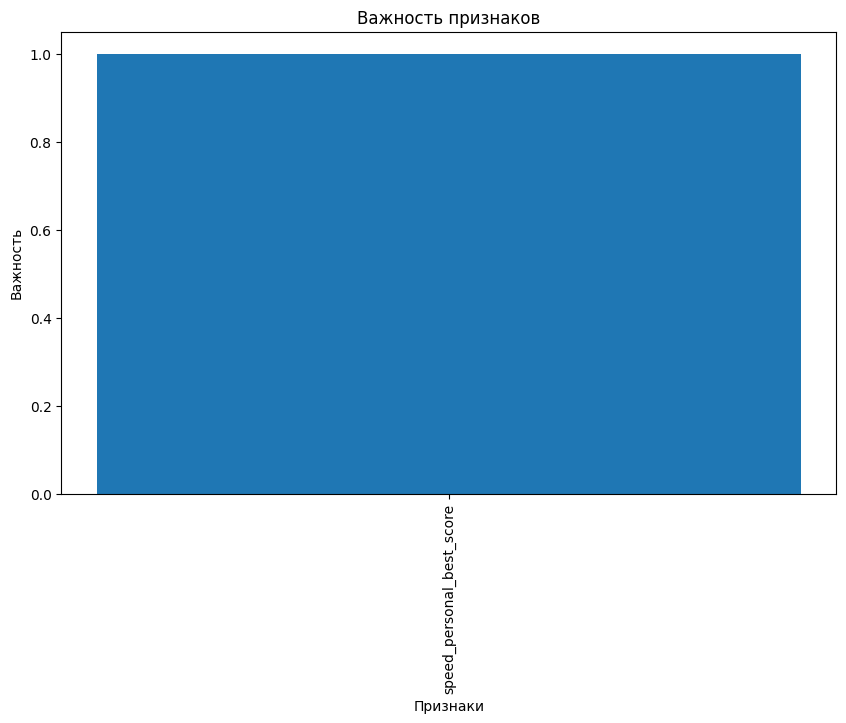

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Важность признаков
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.show()